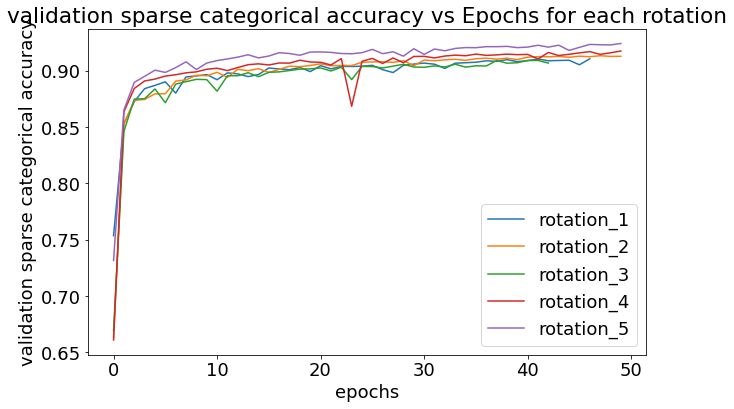

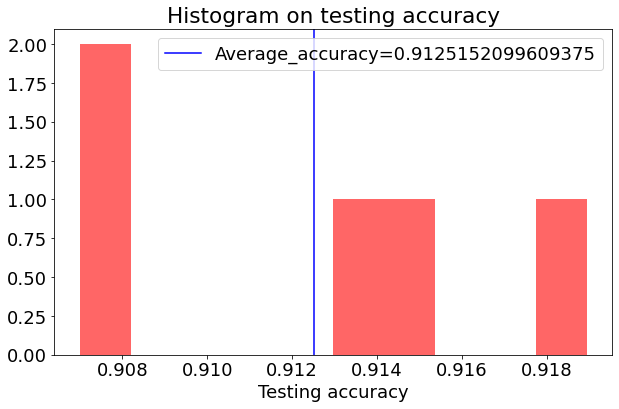

<Figure size 720x432 with 0 Axes>

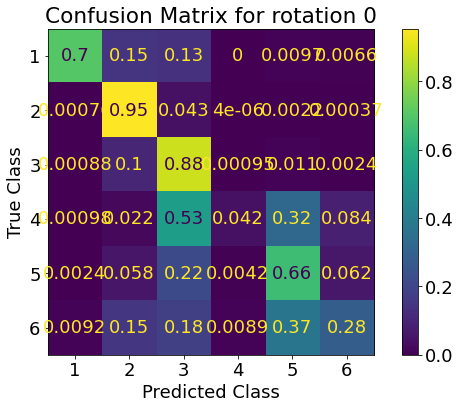

<Figure size 720x432 with 0 Axes>

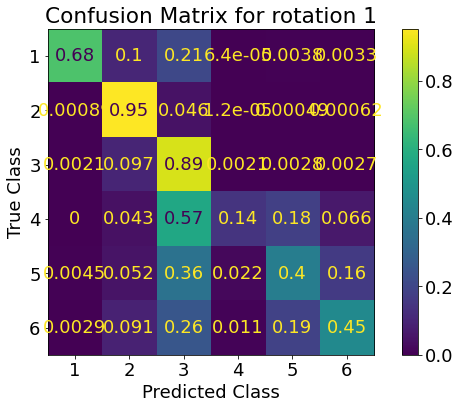

<Figure size 720x432 with 0 Axes>

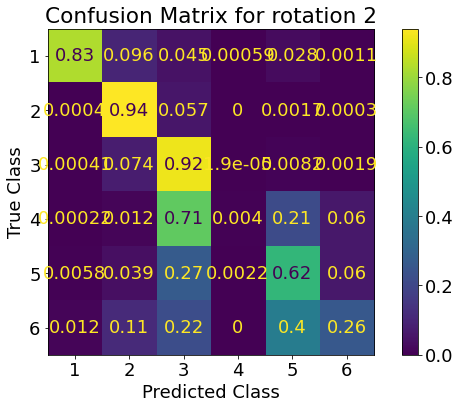

<Figure size 720x432 with 0 Axes>

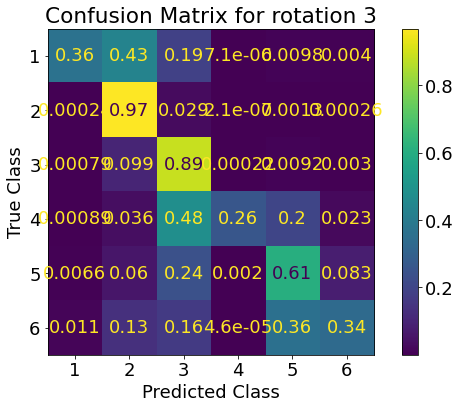

<Figure size 720x432 with 0 Axes>

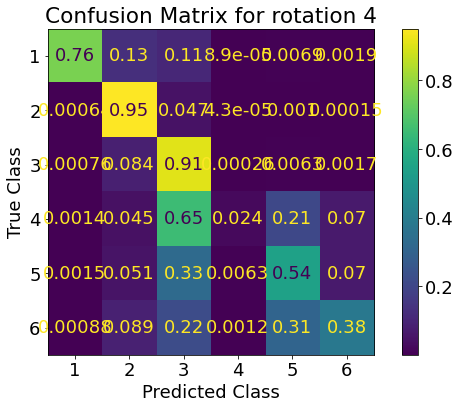

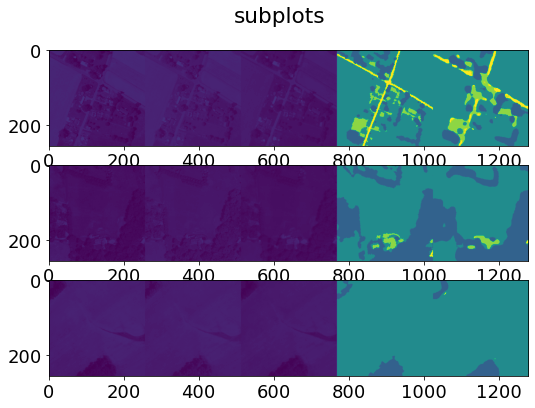

In [6]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import os
import fnmatch
import time
import pickle
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential
import matplotlib.patches as mpatches
from statistics import mean

# Default tick label size
# Default plotting parameters
FIGURESIZE=(10,6)
FONTSIZE=18
plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    

    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

#fetching the results
filebase1 = "history_*.pkl"
hist = read_all_rotations("results", filebase1)
filebase2 = "prediction_*.pkl"
prediction = read_all_rotations("results", filebase2)


#figure 1 validation accuracy

for i in range(len(hist)):
    plt.plot(hist[i]["val_sparse_categorical_accuracy"], label="rotation_"+str(i+1))
    
plt.ylabel('validation sparse categorical accuracy')
plt.xlabel('epochs')
plt.title('validation sparse categorical accuracy vs Epochs for each rotation')
plt.legend()
plt.savefig("valid_spa_acc.png")
plt.show()
plt.close()

# histogram test
evaluation = []
for i in range(len(prediction)):
    evaluation.append(accuracy_score(np.reshape(prediction[i]['test_label'],-1), np.reshape(prediction[i]['test_prediction_label'],-1)))

avg = np.mean(evaluation)    

plt.hist(evaluation,alpha=0.6,color='red')
plt.axvline(x = avg, color='b', label = "Average_accuracy="+str(avg))
plt.xlabel('Testing accuracy')
plt.title('Histogram on testing accuracy')
plt.legend()
plt.savefig("histogram_accuracy.png")
plt.show()
plt.close()

# confusion matrix

for i in range(len(prediction)):
    plt.figure('rot_%d'%i)
    com = confusion_matrix(np.reshape(prediction[i]['test_label'],-1), np.reshape(prediction[i]['test_prediction_label'],-1))
    cm = com.astype('float') / com.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,7)))
    disp.plot()
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix for rotation %d'%i)
    plt.savefig('confusion_matrix_%d.png'%i)
    plt.show()
    plt.close()

# 3 subplots
figur, axes = plt.subplots(3)
figur.suptitle('subplots')
axes[0].imshow(np.concatenate([prediction[3]['test_feature'][1,:,:,0],prediction[3]['test_feature'][1,:,:,1],prediction[3]['test_feature'][1,:,:,2],prediction[3]['test_label'][1], prediction[3]['test_prediction_label'][1]],axis=1))
axes[1].imshow(np.concatenate([prediction[3]['test_feature'][2,:,:,0],prediction[3]['test_feature'][2,:,:,1],prediction[3]['test_feature'][2,:,:,2],prediction[3]['test_label'][2], prediction[3]['test_prediction_label'][2]],axis=1))
axes[2].imshow(np.concatenate([prediction[3]['test_feature'][3,:,:,0],prediction[3]['test_feature'][3,:,:,1],prediction[3]['test_feature'][3,:,:,2],prediction[3]['test_label'][3], prediction[3]['test_prediction_label'][3]],axis=1))
plt.savefig('subplots.png')
    



